In [18]:
import pandas as pd
df1 = pd.read_csv('datasetFlashScore.csv', delimiter=';')
df2 = pd.read_csv('datasetFlashScore2022.csv', delimiter=';')

# Concatena os dois dataframes
df = pd.concat([df1, df2], ignore_index = True)

# Cria um atributo para o resultado do jogo, servindo como target da IA
df['Resultado'] = df.apply(lambda row: "Vitória do time da casa" if int(row['FTHG']) > int(row['FTAG']) else "Vitória do time visitante" if int(row['FTHG']) < int(row['FTAG']) else "Empate", axis=1)

# Cria uma coluna para indicar se o jogo teve 3 gols ou mais
df['Over 2.5'] = df.apply(lambda row: 1 if int(row['FTHG']) + int(row['FTAG']) >= 3 else 0, axis=1)
dfTestes = df.head(20)
dfTreinamento = df.iloc[20:]

In [19]:
from pycaret.classification import *
s = setup(dfTreinamento, target = 'Over 2.5', session_id = 123)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves th

,Description,Value
0,Session id,123
1,Target,Over 2.5
2,Target type,Binary
3,Original data shape,"(470, 43)"
4,Transformed data shape,"(470, 156)"
5,Transformed train set shape,"(329, 156)"
6,Transformed test set shape,"(141, 156)"
7,Numeric features,20
8,Categorical features,22
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves th

In [20]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9970,1.0000,1.0000,0.9938,0.9968,0.9939,0.9941,0.5190
ridge,Ridge Classifier,0.7936,0.8954,0.6992,0.8380,0.7589,0.5808,0.5917,0.2590
svm,SVM - Linear Kernel,0.6562,0.9008,0.6646,0.7866,0.6025,0.3140,0.4010,0.2590
et,Extra Trees Classifier,0.6201,0.6583,0.5225,0.6185,0.5542,0.2294,0.2408,0.3650
nb,Naive Bayes,0.6017,0.6005,0.5804,0.5655,0.5658,0.1973,0.2016,0.2530
rf,Random Forest Classifier,0.5925,0.6460,0.5233,0.5788,0.5403,0.1786,0.1861,0.4020
lda,Linear Discriminant Analysis,0.5897,0.6036,0.5221,0.5710,0.5355,0.1717,0.1767,0.2940
ada,Ada Boost Classifier,0.5564,0.5744,0.6004,0.5111,0.5473,0.1158,0.1221,0.3620
lightgbm,Light Gradient Boosting Machine,0.5381,0.5482,0.5871,0.5000,0.5333,0.0813,0.0820,1.0710
dt,Decision Tree Classifier,0.5380,0.5383,0.5596,0.5002,0.5218,0.0762,0.0780,0.2520


In [21]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9697,1.0000,1.0000,0.9375,0.9677,0.9392,0.9410
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

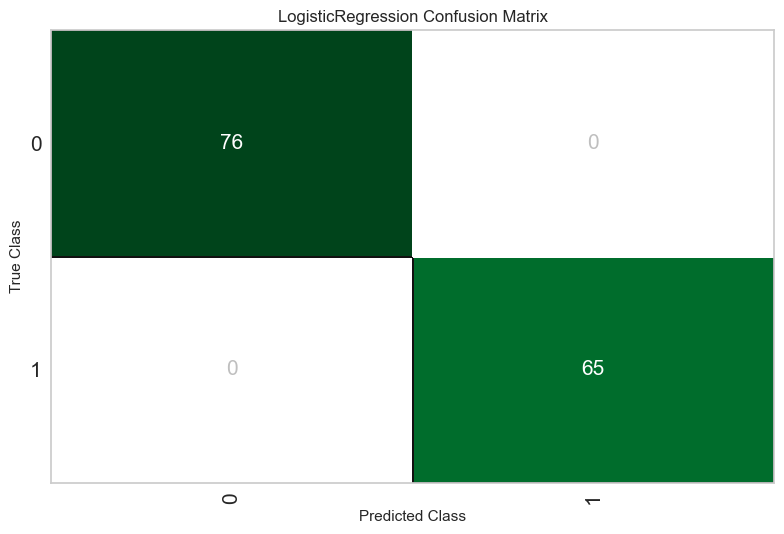

In [23]:
plot_model(best, plot='confusion_matrix')

In [24]:
predictions = predict_model(best, data=dfTestes, raw_score = True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,HomeTeam,AwayTeam,DateTime,FTHG,FTAG,HGE,AGE,HPB,APB,HTG,...,APC,HATK,AATK,HATKP,AATKP,Resultado,Over 2.5,prediction_label,prediction_score_0,prediction_score_1
0,Bahia,Atlético-MG,06.12.2023 21:30,4,1,1.50,1.00,38%,62%,14,...,466,81,111,45,26,Vitória do time da casa,1,1,0.0000,1.0000
1,Coritiba,Corinthians,06.12.2023 21:30,0,2,0.55,0.58,43%,57%,12,...,617,93,104,63,45,Vitória do time visitante,0,0,0.9116,0.0884
2,Cruzeiro,Palmeiras,06.12.2023 21:30,1,1,1.26,1.47,51%,49%,14,...,298,116,60,38,26,Empate,0,0,0.9113,0.0887
3,Cuiabá,Athletico-PR,06.12.2023 21:30,3,0,2.74,0.85,47%,53%,12,...,436,76,102,28,62,Vitória do time da casa,1,1,0.0675,0.9325
4,Fluminense,Grêmio,06.12.2023 21:30,2,3,2.10,2.10,62%,38%,20,...,238,146,68,76,27,Vitória do time visitante,1,1,0.0000,1.0000
5,Internacional,Botafogo,06.12.2023 21:30,3,1,1.48,0.45,53%,47%,7,...,417,104,120,21,31,Vitória do time da casa,1,1,0.0010,0.9990
6,Santos,Fortaleza,06.12.2023 21:30,1,2,0.97,0.94,57%,43%,14,...,231,112,81,72,32,Vitória do time visitante,1,1,0.4543,0.5457
7,São Paulo,Flamengo,06.12.2023 21:30,1,0,0.52,0.44,47%,53%,9,...,479,73,112,26,49,Vitória do time da casa,0,0,0.9989,0.0011
8,Vasco,Red Bull Bragantino,06.12.2023 21:30,2,1,1.83,0.88,46%,54%,11,...,333,88,108,44,35,Vitória do time da casa,1,1,0.0948,0.9052
9,Goiás,América-MG,06.12.2023 19:00,1,0,0.91,0.91,46%,54%,12,...,457,66,128,44,62,Vitória do time da casa,0,0,0.9989,0.0011
